<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/UAS/Muhammad%20Raihan%20Butar-Butar_UAS_MNIST%20ANGKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

UAS Machine Learning Image Classification

Model : CNN

Dataset : MNIST

Dokumentasi ChatGPT : https://chatgpt.com/share/7b622a98-7dc5-4d3e-a5d4-0fa34688af87

# INSTALL LIBRARY

In [1]:
# !pip install tensorflow

# IMPORT LIBRARY

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATASET

Memuat dataset MNIST yang berisi kumpulan gambar angka tulisan tangan.

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


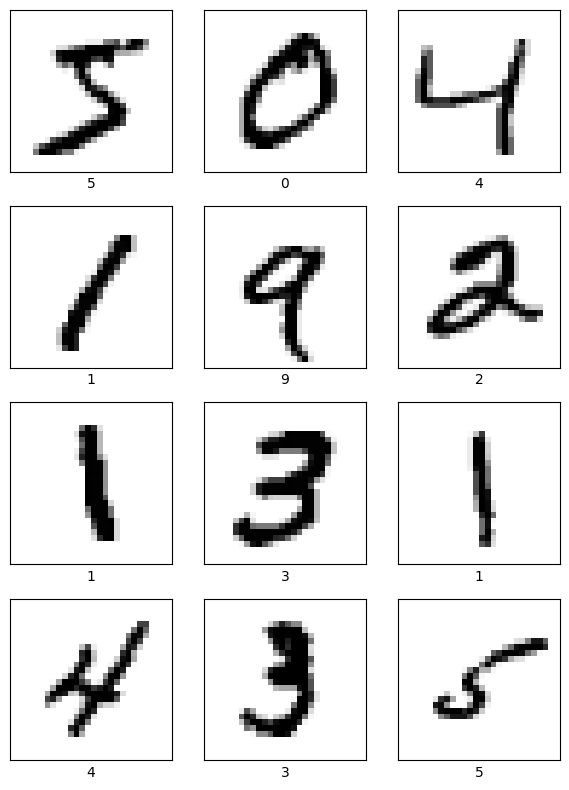

In [4]:
# Function to display a grid of images
def plot_images(images, labels, num_images=12, num_cols=3):
    num_rows = num_images // num_cols
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.tight_layout()
    plt.show()

# Display the first 12 images from the training dataset
plot_images(x_train, y_train, num_images=12, num_cols=3)

# PREPROCESSING

In [5]:
# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to match the input shape of the model (28x28x1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# MODELING

Membangun dan mengompilasi model CNN

In [6]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# TRAINING

Melatih model

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 6ms/step - loss: 0.2305 - accuracy: 0.9344 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0612 - accuracy: 0.9818 - val_loss: 0.0632 - val_accuracy: 0.9827
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.0430 - val_accuracy: 0.9879
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0451 - val_accuracy: 0.9874
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0396 - val_accuracy: 0.9893
Epoch 

Memvisualisasikan akurasi serta loss dari training dan validation

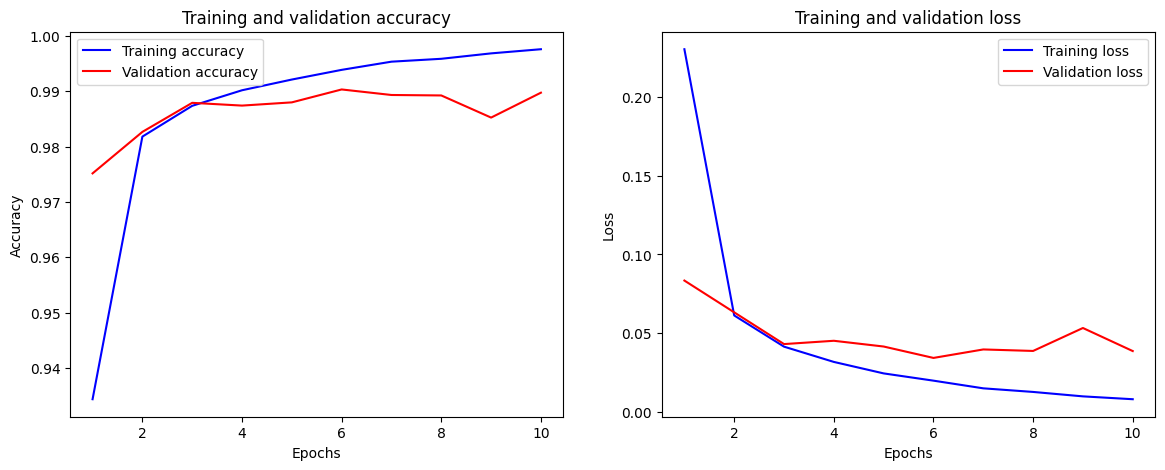

In [8]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_history(history)

# EVALUATE

Mengevaluasi model dan menampilkan akurasi model


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.0316 - accuracy: 0.9910 - 846ms/epoch - 3ms/step
Test accuracy: 0.9909999966621399


# SAVE MODEL

In [10]:
# Save the model
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# PREDICTING

Melakukan prediksi gambar menggunakan data uji dan memvisualisasikan hasil prediksi

313/313 [==============================] - 1s 2ms/step


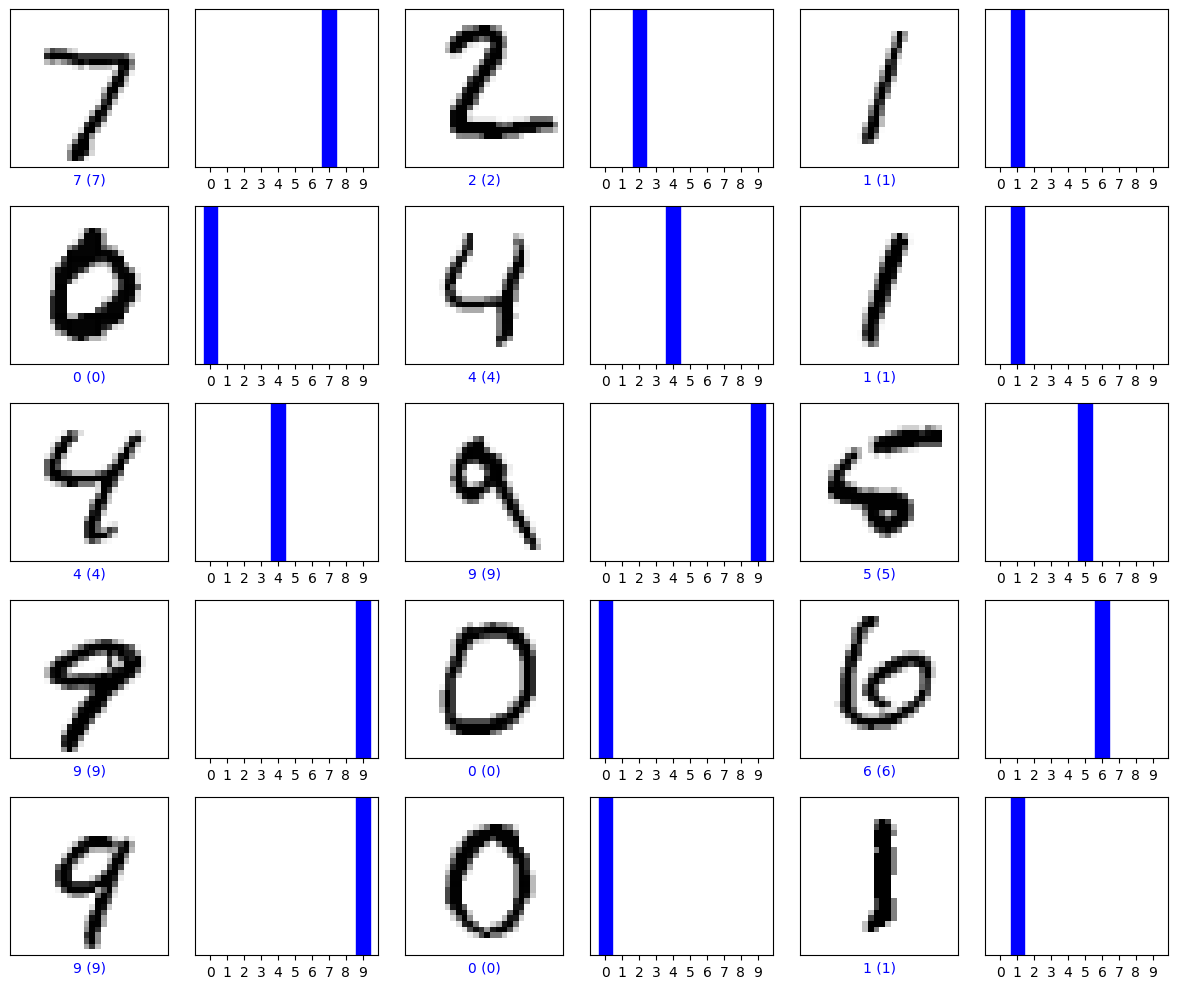

In [11]:
# Load the model
loaded_model = tf.keras.models.load_model('mnist_model.h5')

# Predict on new data
predictions = loaded_model.predict(x_test)

# Display some predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({np.argmax(true_label)})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.tight_layout()
plt.show()